In [41]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [42]:
# Load paths to each set of experiments
control_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
mutant_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/perturbation/slices/w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
control = Experiment(control_path)
mutant = Experiment(mutant_path)

In [43]:
""" ANNOTATE ALL LAYERS """
for experiment in (control, mutant):
    for stack in experiment:
        for layer in stack:
            add_selection_to_layer(layer)

In [10]:
stack = mutant[mutant.disc_names.index(42)]
layer = stack[3]
add_selection_to_layer(layer)

In [40]:
from modules.io import IO
from matplotlib.path import Path
#from matplotlib.patches import PathPatch
#import gc


def add_selection_to_layer(layer):
    
    io = IO()
    
    # load points
    selection_path = os.path.join(*np.insert(layer.path.rsplit('/', maxsplit=2), 1, 'selections'))
    md = io.read_json(os.path.join(selection_path, 'md.json'))
    pts = io.read_npy(os.path.join(selection_path, 'selection.npy'))

    # mark points within selected path
    include_layer = md['include']
    layer.df['include_selection'] = include_layer
    layer.df['near_furrow'] = False
    if include_layer:
        path = Path(pts, closed=False)
        layer.df['near_furrow'] = path.contains_points(layer.df[['centroid_x', 'centroid_y']].values)
    
    # save updated contours
    contours = layer.df.to_json()
    io.write_json(os.path.join(layer.path, 'contours.json'), contours)
    
#     # create selection figure
#     fig, ax = plt.subplots(figsize=(10, 10))
#     _ = layer.get_channel('b').show(segments=False, ax=ax, cmap=plt.cm.Greys)
    
#     if include_layer:
#         patch = PathPatch(path, fc=(1,0,0,.1), lw=3, ec=(1,0,0,1))
#         ax.add_patch(patch)
#     else:
#         ax.plot([0, layer.shape[0]], [0, layer.shape[1]], '-r', lw=25)
#         ax.plot([0, layer.shape[1]], [layer.shape[0], 0], '-r', lw=25)
        
#     # save selection figure
#     im_kw = dict(format='png', dpi=100, bbox_inches='tight', pad_inches=0)
#     ax.axis('off') 
#     fig.savefig(os.path.join(layer.path, 'selection.png'), **im_kw)
#     fig.clf()
#     plt.close(fig)
#     gc.collect()

In [5]:
stack = mutant[mutant.disc_names.index(42)]
layer = stack[3]

In [16]:
from modules.io import IO
io = IO()
    
# load points
selection_path = os.path.join(*np.insert(layer.path.rsplit('/', maxsplit=2), 1, 'selections'))
pts = io.read_npy(os.path.join(selection_path, 'selection.npy'))

In [17]:
pts

array([[1472.21994115,   48.84943765],
       [1496.03939281,  834.89134241],
       [1555.58802196, 1990.1347479 ],
       [ 876.73364966, 1990.1347479 ],
       [ 876.73364966,   36.93971182]])

In [22]:
from matplotlib.path import Path

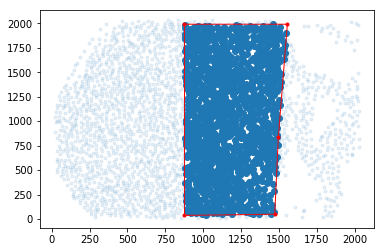

In [36]:
xy = layer.df[['centroid_x', 'centroid_y']].values

path = Path(pts, closed=False)
inside = path.contains_points(xy)

fig, ax = plt.subplots()
ax.plot(*xy.T, '.', alpha=0.1)
ax.plot(*pts.T, '.r')

#df = layer.df[layer.df.near_furrow]
#ax.plot(df.centroid_x, df.centroid_y, '.', alpha=1)

from matplotlib.patches import Polygon
poly = Polygon(pts,ec=(1,0,0,1), lw=1,
                       fc=(1,1,1,0.2), fill=False,
                       zorder=1, closed=True)
ax.add_patch(poly)


ax.scatter(*xy[inside].T)